In [1]:
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')

In [2]:
import os, os.path
import numpy
from galpy.potential import LogarithmicHaloPotential
from galpy.orbit import Orbit
from galpy.snapshot import nemo_util
import seaborn as sns
from galpy.util import bovy_plot, bovy_coords, bovy_conversion
%pylab inline

Populating the interactive namespace from numpy and matplotlib


# Analysis of the NEMO snapshots of impacts of a GC stream with a DM stream

##Just before the impact

We introduce the DM stream 0.125 NEMO time units (~120 Myr) before the point of closest approach. This is what the DM snapshots look like then, compared to where the GC stream is at the time of impact (thus, the two streams are not shown at the same time here). We also show the orbit that the DM will take.

In [8]:
# GC
filename= os.path.join(os.getenv('DATADIR'),'bovy','stream-stream',
                       'gc_evol_unp.dat')
snap_gc= nemo_util.read(filename,swapyz=True)
# Various DM streams
filename= os.path.join(os.getenv('DATADIR'),'bovy','stream-stream',
                       'dm_evol_0.50_untilimpact.dat')
snap_dm0p5= nemo_util.read(filename,swapyz=True)
filename= os.path.join(os.getenv('DATADIR'),'bovy','stream-stream',
                       'dm_evol_0.25_untilimpact.dat')
snap_dm0p25= nemo_util.read(filename,swapyz=True)
filename= os.path.join(os.getenv('DATADIR'),'bovy','stream-stream',
                       'dm_evol_0.375_untilimpact.dat')
snap_dm0p375= nemo_util.read(filename,swapyz=True)

In [9]:
# Orbit of the DM
lp= LogarithmicHaloPotential(normalize=1.,q=0.9)
R0, V0= 8., 220.
def rectangular_to_cylindrical(xv):
    R,phi,Z= bovy_coords.rect_to_cyl(xv[:,0],xv[:,1],xv[:,2])
    vR,vT,vZ= bovy_coords.rect_to_cyl_vec(xv[:,3],xv[:,4],xv[:,5],R,phi,Z,cyl=True)
    out= numpy.empty_like(xv)
    # Preferred galpy arrangement of cylindrical coordinates
    out[:,0]= R
    out[:,1]= vR
    out[:,2]= vT
    out[:,3]= Z
    out[:,4]= vZ
    out[:,5]= phi
    return out
# DM at the time of impact
xv_dm_impact= numpy.array([-13.500000,2.840000,-1.840000,6.82200571,132.7700529,149.4174464])
RvR_dm_impact= rectangular_to_cylindrical(xv_dm_impact[:,numpy.newaxis].T)[0,:]
dm_impact= Orbit([RvR_dm_impact[0]/R0,RvR_dm_impact[1]/V0,RvR_dm_impact[2]/V0,
                  RvR_dm_impact[3]/R0,RvR_dm_impact[4]/V0,RvR_dm_impact[5]],ro=R0,vo=V0)
dm_impact= dm_impact.flip()
# Integrate to 0.125 time units earlier
times= numpy.linspace(0.,0.125*0.9777922212082034/bovy_conversion.time_in_Gyr(V0,R0),1001)
dm_impact.integrate(times,lp)
dm_forward= dm_impact(times[-1]).flip()
times= numpy.linspace(0.,0.250*0.9777922212082034/bovy_conversion.time_in_Gyr(V0,R0),1001)
dm_forward.integrate(times,lp)

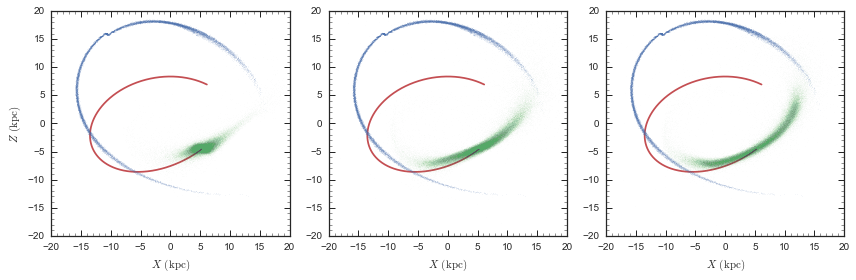

In [11]:
figsize(12,4)
subplot(1,3,1)
bovy_plot.bovy_plot(snap_gc[:,1,-5],snap_gc[:,3,-5],',',alpha=0.05,
                    color=sns.color_palette()[0],zorder=1,
                    xrange=[-20.,20.],yrange=[-20.,20],
                    xlabel=r'$X\,(\mathrm{kpc})$',
                    ylabel=r'$Z\,(\mathrm{kpc})$',
                    gcf=True)
plot(snap_dm0p25[:,1,-1],snap_dm0p25[:,3,-1],',',alpha=0.01,color=sns.color_palette()[1],zorder=2)
dm_forward.plot(d1='x',d2='z',overplot=True,color=sns.color_palette()[2],zorder=0)
xlim(-20.,20)
ylim(-20.,20)
subplot(1,3,2)
bovy_plot.bovy_plot(snap_gc[:,1,-5],snap_gc[:,3,-5],',',alpha=0.05,
                    color=sns.color_palette()[0],zorder=1,
                    xrange=[-20.,20.],yrange=[-20.,20],
                    xlabel=r'$X\,(\mathrm{kpc})$',
                    gcf=True)
plot(snap_dm0p375[:,1,-1],snap_dm0p375[:,3,-1],',',alpha=0.01,color=sns.color_palette()[1],zorder=2)
dm_forward.plot(d1='x',d2='z',overplot=True,color=sns.color_palette()[2],zorder=0)
xlim(-20.,20)
ylim(-20.,20)
subplot(1,3,3)
bovy_plot.bovy_plot(snap_gc[:,1,-5],snap_gc[:,3,-5],',',alpha=0.05,
                    color=sns.color_palette()[0],zorder=1,
                    xrange=[-20.,20.],yrange=[-20.,20],
                    xlabel=r'$X\,(\mathrm{kpc})$',
                    gcf=True)
plot(snap_dm0p5[:,1,-1],snap_dm0p5[:,3,-1],',',alpha=0.01,color=sns.color_palette()[1],zorder=2)
dm_forward.plot(d1='x',d2='z',overplot=True,color=sns.color_palette()[2],zorder=0)
xlim(-20.,20)
ylim(-20.,20)
tight_layout()

## After impact

Here is what the streams looks like after the impact:

In [13]:
# Snapshots are now combined, read various DM streams
filename= os.path.join(os.getenv('DATADIR'),'bovy','stream-stream',
                       'gcdm_evol_0.50_afterimpact.dat')
snap_dm0p5_after= nemo_util.read(filename,swapyz=True)
filename= os.path.join(os.getenv('DATADIR'),'bovy','stream-stream',
                       'gcdm_evol_0.375_afterimpact.dat')
snap_dm0p375_after= nemo_util.read(filename,swapyz=True)
filename= os.path.join(os.getenv('DATADIR'),'bovy','stream-stream',
                       'gcdm_evol_0.25_afterimpact.dat')
snap_dm0p25_after= nemo_util.read(filename,swapyz=True)

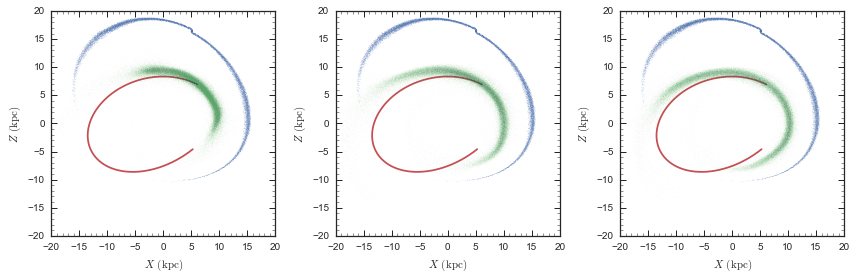

In [14]:
figsize(12,4)
subplot(1,3,1)
bovy_plot.bovy_plot(snap_dm0p25_after[:100000,1,-1],
                    snap_dm0p25_after[:100000,3,-1],
                    ',',alpha=0.05,
                    color=sns.color_palette()[0],zorder=1,
                    xrange=[-20.,20.],yrange=[-20.,20],
                    xlabel=r'$X\,(\mathrm{kpc})$',
                    ylabel=r'$Z\,(\mathrm{kpc})$',
                    gcf=True)
plot(snap_dm0p25_after[100000:,1,-1],snap_dm0p25_after[100000:,3,-1],
     ',',alpha=0.01,color=sns.color_palette()[1],zorder=2)
dm_forward.plot(d1='x',d2='z',overplot=True,color=sns.color_palette()[2],zorder=0)
xlim(-20.,20)
ylim(-20.,20)
subplot(1,3,2)
bovy_plot.bovy_plot(snap_dm0p375_after[:100000,1,-1],
                    snap_dm0p375_after[:100000,3,-1],
                    ',',alpha=0.05,
                    color=sns.color_palette()[0],zorder=1,
                    xrange=[-20.,20.],yrange=[-20.,20],
                    xlabel=r'$X\,(\mathrm{kpc})$',
                    ylabel=r'$Z\,(\mathrm{kpc})$',
                    gcf=True)
plot(snap_dm0p375_after[100000:,1,-1],snap_dm0p375_after[100000:,3,-1],
     ',',alpha=0.01,color=sns.color_palette()[1],zorder=2)
dm_forward.plot(d1='x',d2='z',overplot=True,color=sns.color_palette()[2],zorder=0)
xlim(-20.,20)
ylim(-20.,20)
subplot(1,3,3)
bovy_plot.bovy_plot(snap_dm0p5_after[:100000,1,-1],
                    snap_dm0p5_after[:100000,3,-1],
                    ',',alpha=0.05,
                    color=sns.color_palette()[0],zorder=1,
                    xrange=[-20.,20.],yrange=[-20.,20],
                    xlabel=r'$X\,(\mathrm{kpc})$',
                    ylabel=r'$Z\,(\mathrm{kpc})$',
                    gcf=True)
plot(snap_dm0p5_after[100000:,1,-1],snap_dm0p5_after[100000:,3,-1],
     ',',alpha=0.01,color=sns.color_palette()[1],zorder=2)
dm_forward.plot(d1='x',d2='z',overplot=True,color=sns.color_palette()[2],zorder=0)
xlim(-20.,20)
ylim(-20.,20)
tight_layout()

## Kicks

In [28]:
# Stream particles within X kpc from the impact, to limit
# the amount of orbit integration
indx= numpy.sqrt((snap[:,1,-5]+13.500000)**2.\
                 +(snap[:,2,-5]+1.840000)**2.\
                 +(snap[:,3,-5]-2.840000)**2.) < 30.
# times for orbit integration
times= numpy.linspace(0.,0.125*0.9777922212082034/bovy_conversion.time_in_Gyr(V0,R0),101)
# For the 0.25 impact
snapvdiff_dm0p25= numpy.zeros((len(snap),3))
snapvdiff_dm0p375= numpy.zeros((len(snap),3))
snapvdiff_dm0p5= numpy.zeros((len(snap),3))
for ii in range(len(snap)):
    if not indx[ii]: continue
    # Integrate backwards to the impact
    RvR= rectangular_to_cylindrical(snap_dm0p25_after[ii,1:,-1][:,numpy.newaxis].T)[0,:]
    orb= Orbit([RvR[0]/R0,RvR[1]/V0,RvR[2]/V0,
                RvR[3]/R0,RvR[4]/V0,RvR[5]],ro=R0,vo=V0).flip()
    orb.integrate(times,lp)
    snapvdiff_dm0p25[ii,0]= -orb.vx(times[-1])-snap_gc[ii,4,-5]
    snapvdiff_dm0p25[ii,1]= -orb.vy(times[-1])-snap_gc[ii,5,-5]
    snapvdiff_dm0p25[ii,2]= -orb.vz(times[-1])-snap_gc[ii,6,-5]
    # Integrate backwards to the impact
    RvR= rectangular_to_cylindrical(snap_dm0p375_after[ii,1:,-1][:,numpy.newaxis].T)[0,:]
    orb= Orbit([RvR[0]/R0,RvR[1]/V0,RvR[2]/V0,
                RvR[3]/R0,RvR[4]/V0,RvR[5]],ro=R0,vo=V0).flip()
    orb.integrate(times,lp)
    snapvdiff_dm0p375[ii,0]= -orb.vx(times[-1])-snap_gc[ii,4,-5]
    snapvdiff_dm0p375[ii,1]= -orb.vy(times[-1])-snap_gc[ii,5,-5]
    snapvdiff_dm0p375[ii,2]= -orb.vz(times[-1])-snap_gc[ii,6,-5]
    # Integrate backwards to the impact
    RvR= rectangular_to_cylindrical(snap_dm0p5_after[ii,1:,-1][:,numpy.newaxis].T)[0,:]
    orb= Orbit([RvR[0]/R0,RvR[1]/V0,RvR[2]/V0,
                RvR[3]/R0,RvR[4]/V0,RvR[5]],ro=R0,vo=V0).flip()
    orb.integrate(times,lp)
    snapvdiff_dm0p5[ii,0]= -orb.vx(times[-1])-snap_gc[ii,4,-5]
    snapvdiff_dm0p5[ii,1]= -orb.vy(times[-1])-snap_gc[ii,5,-5]
    snapvdiff_dm0p5[ii,2]= -orb.vz(times[-1])-snap_gc[ii,6,-5]

(-0.6, 0.6)

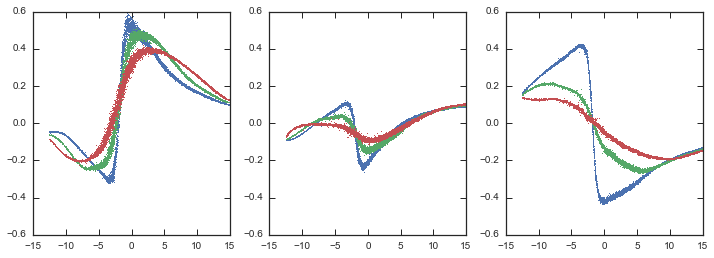

In [32]:
subplot(1,3,1)
plot(snap_gc[indx,3,-5],snapvdiff_dm0p25[indx,0],',',color=sns.color_palette()[0])
plot(snap_gc[indx,3,-5],snapvdiff_dm0p375[indx,0],',',color=sns.color_palette()[1])
plot(snap_gc[indx,3,-5],snapvdiff_dm0p5[indx,0],',',color=sns.color_palette()[2])
xlim(-15.,15.)
ylim(-.6,.6)
subplot(1,3,2)
plot(snap_gc[indx,3,-5],snapvdiff_dm0p25[indx,1],',',color=sns.color_palette()[0])
plot(snap_gc[indx,3,-5],snapvdiff_dm0p375[indx,1],',',color=sns.color_palette()[1])
plot(snap_gc[indx,3,-5],snapvdiff_dm0p5[indx,1],',',color=sns.color_palette()[2])
xlim(-15.,15.)
ylim(-.6,.6)
subplot(1,3,3)
plot(snap_gc[indx,3,-5],snapvdiff_dm0p25[indx,2],',',color=sns.color_palette()[0])
plot(snap_gc[indx,3,-5],snapvdiff_dm0p375[indx,2],',',color=sns.color_palette()[1])
plot(snap_gc[indx,3,-5],snapvdiff_dm0p5[indx,2],',',color=sns.color_palette()[2])
xlim(-15.,15.)
ylim(-.6,.6)